In [229]:
%%capture
%matplotlib inline
!pip3 install matplotlib
import cv2
import os
import time
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image

fig1 = plt.figure(figsize = (4,4))

### Capturando as camadas de saída

In [230]:
def getOutputLayers(net):
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    return ln

### Lendo as Labels à partir do arquivo de nomes

In [238]:
names = []
with open('coco.names') as name:
    names = name.read().split('\n')

### Carregando o modelo e configurando as preferências

#### readNetFromDarknet: Lê a arquitetura da rede à partir do arquivo cfg e os pesos treinados no arquivo weights
#### setPreferableBackend: Configura o tipo de Backend (Inference Engine (OpenVINO) x OpenCV (Default)
#### setPreferableTarget: Configura o hardware que carregará a rede

In [285]:
net = cv2.dnn.readNetFromDarknet('yolo.cfg', 'yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_DEFAULT)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [286]:
available_files = [file for file in os.listdir('.') if 'jpg' in file or 'png' in file]
print (available_files)

['image.png', 'brocolis.jpg', 'result.png', 'How-to-Grow-Broccoli-at-Home.jpg', '2broccoli.jpg', 'image.jpg', 'res.jpg', 'fotografia_de_pessoas_na_rua.jpg']


### Lê e mostra a Imagem

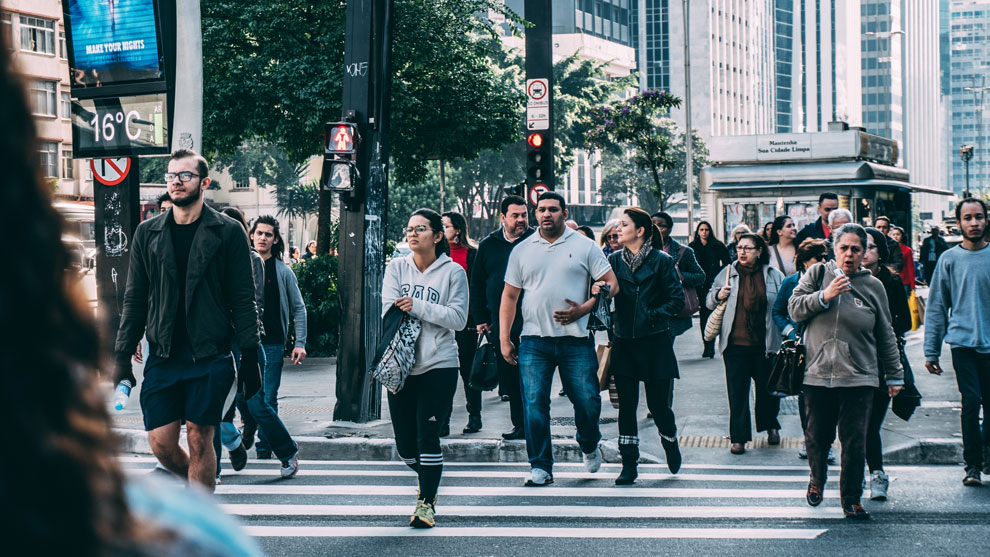

In [287]:
imgname = available_files[7]
img = cv2.imread(imgname)
Image(imgname)

#### blobFromImage:
Cria um blob de 4 dimensões apropriado para servir de entrada para a rede, tratando a imagem de váriass maneiras.

In [288]:
blob = cv2.dnn.blobFromImage(img, 1.0/255, (416, 416), swapRB=True, crop=False)

In [294]:
init_time = time.time()

net.setInput(blob)
outs = net.forward(getOutputLayers(net))

print (f'Time consumed: {time.time() - init_time}')

Time consumed: 0.14668679237365723


#### Parse de resultados do YOLO:

In [290]:
objects = []
threshold = 0.3
h, w = img.shape[:2]
print (h, w)
for out in outs:
    
    for detection in out:
        scores = detection[5:]
        max_score = np.argmax(scores)
        score = scores[max_score]
        if score >= threshold:
            centerx, centery, width, height = tuple(int(val*multiplier) for val, multiplier in zip(detection[0:4], [w,h,w,h]))
            x, y = int(centerx - width/2), int(centery - height/2)
            objects.append(((x,y),(x+width, y+height), names[max_score]))
            

557 990


In [291]:
print (objects)

[((509, 185), (628, 483), 'person'), ((117, 167), (281, 535), 'person'), ((365, 190), (489, 539), 'person'), ((576, 210), (690, 482), 'person'), ((790, 218), (900, 529), 'person'), ((724, 277), (771, 418), 'person'), ((945, 269), (977, 432), 'person')]


In [309]:
res = img.copy()
font = cv2.FONT_HERSHEY_SIMPLEX

for pos, size, label in objects:
    cv2.rectangle(res, (pos[0], pos[1]-22), (size[0], pos[1]), (0,255,0), -1) 
    cv2.putText(res, label, (pos[0], pos[1]-4), font, 1,(255,255,255),2,cv2.LINE_AA)   
    cv2.rectangle(res, pos, size, (0,255,0), 4)

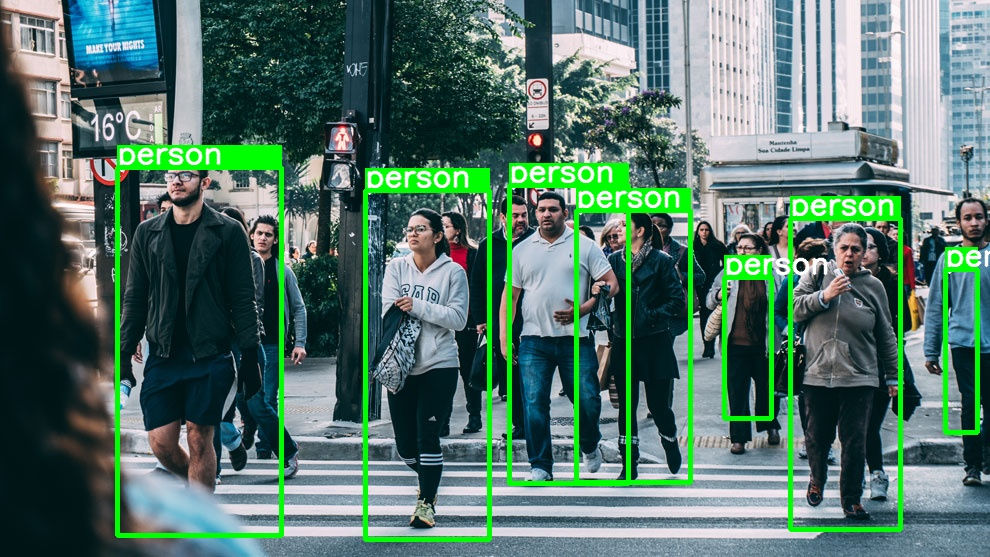

In [310]:
cv2.imwrite('res.jpg', res)
Image('res.jpg')